In [32]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

def write_fasta(sequences, output_file):
    with open(output_file, "w") as file:
        for i, sequence in enumerate(sequences):
            file.write(f">Sequence_{i+1}\n")
            file.write(f"{sequence}\n")

# Function definitions
def parse_data(file_path):
    sequences, secondary_structures = [], []
    parsing_sequences = False
    with open(file_path, "r") as file:
        for line in file:
            line = line.strip()
            if line == "<>":
                parsing_sequences = True
            elif line == "end":
                parsing_sequences = False
            elif parsing_sequences:
                parts = line.split()
                if len(parts) == 2:
                    amino_acid, sec_structure = parts
                    sequences.append(amino_acid)
                    secondary_structures.append(sec_structure)
    return sequences, secondary_structures

def parse_data_for_fasta(file_path):
    sequences, secondary_structures = [], []
    parsing_sequences = False
    with open(file_path, "r") as file:
        sequence = ""
        secondary_structure = ""
        for line in file:
            line = line.strip()
            if line == "<>" and not parsing_sequences:
                parsing_sequences = True
            elif line == "end" or line == "<end>":
                parsing_sequences = False
                sequences.append(sequence)
                secondary_structures.append(secondary_structure)
                sequence = ""
                secondary_structure = ""
            elif parsing_sequences and line == "<>":
                sequences.append(sequence)
                secondary_structures.append(secondary_structure)
                sequence = ""
                secondary_structure = ""
            elif parsing_sequences:
                parts = line.split()
                if len(parts) == 2:
                    amino_acid, sec_structure = parts
                    sequence += amino_acid
                    secondary_structure += sec_structure
    return sequences

def plot_class_imbalances(y):
    class_counts = {}
    for label in y:
        class_counts[label] = class_counts.get(label, 0) + 1
    
    # Define custom labels
    custom_labels = {
        '_': 'Coil (C)',
        'e': 'β-sheet (E)',
        'h': 'α-Helix (H)'
    }
    
    labels = list(custom_labels.values())
    counts = [class_counts.get(key, 0) for key in custom_labels.keys()]
    total = sum(counts)
    
    plt.figure(figsize=(6, 5))
    rects = plt.bar(labels, counts)
    
    # Store bar objects for annotation
    for rect, count in zip(rects, counts):
        height = rect.get_height()
        percentage = (count / total) * 100
        plt.text(rect.get_x() + rect.get_width() / 2, height + 0.05 * total, f"{percentage:.1f}%\n({count})", ha='center', va='bottom')
    
    plt.grid(axis='y')
    plt.xlabel("Class Labels")
    plt.ylabel("Count")
    plt.ylim(top=max(counts) * 1.3)  # Adjust the y-axis limit
    plt.text(0.5, 0.9, f"Total: {total}", transform=plt.gca().transAxes, fontsize=12, horizontalalignment='center', verticalalignment='top')
    plt.title("Class Imbalance Distribution")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust spacing for better visualization
    plt.show()


In [33]:
# Read and parse the data
train_path = 'Q_and_s_data/protein-secondary-structure.train.txt'
test_path = 'Q_and_s_data/protein-secondary-structure.test.txt'

X_train, y_train = parse_data(train_path)
X_test, y_test = parse_data(test_path)

In [34]:
X_train, y_train = parse_data(train_path)
X_test, y_test = parse_data(test_path)

In [35]:
write_fasta(parse_data_for_fasta(train_path), "train.fasta")
write_fasta(parse_data_for_fasta(test_path), "test.fasta")

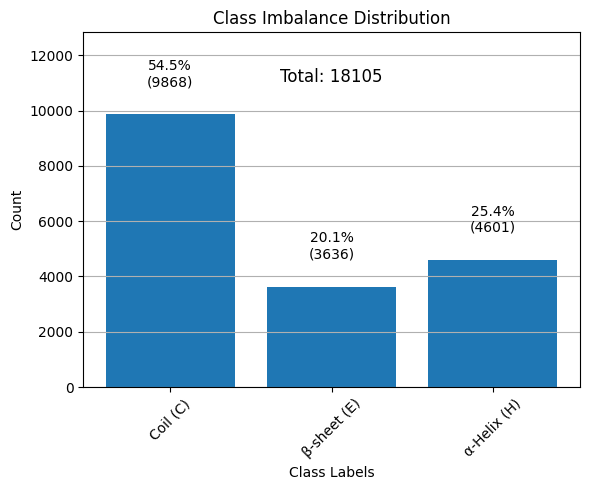

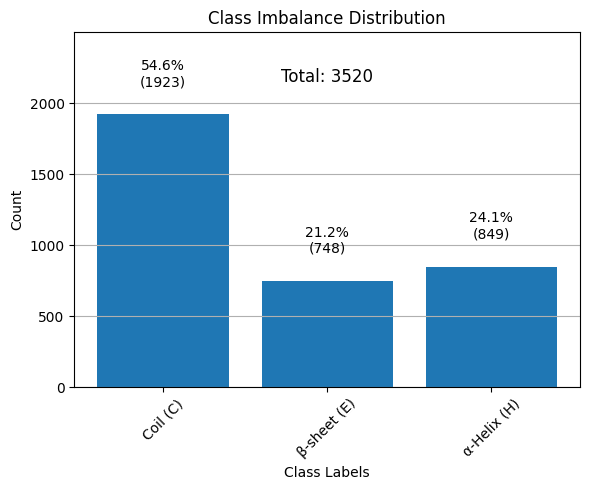

In [36]:
plot_class_imbalances(y_train)
plot_class_imbalances(y_test)